## Checking molar weight bin effect on top-1 accuracy

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Descriptors import MolWt

Load high molar weight splits predictions

In [2]:
transformer_high = pd.read_csv(
    "../../choriso-models/predictions/Transformer_high.csv"
)
graph2smiles_high = pd.read_csv(
    "../../choriso-models/predictions/Graph2smiles_high.csv"
)

Define bin count function

In [54]:
def bin_mw_count(df, bins):
    df["target_mw"] = df["target"].apply(
        lambda x: MolWt(Chem.MolFromSmiles(x))
        if Chem.MolFromSmiles(x)
        else 1000
    )
    results = []

    for i, row in df.iterrows():
        results.append(row["target"] == row["pred_0"])

    df["correct"] = results

    mw_acc = df.groupby(pd.cut(df["target_mw"], bins)).apply(
        lambda x: x["correct"].sum() / len(x) * 100
    )

    return mw_acc


mw_bins = [700, 800, 900, 1000, 1100, 1200]

accs = pd.DataFrame()

for i in (transformer_high, graph2smiles_high):
    x = bin_mw_count(i, mw_bins)
    # concatenate series to dataframe
    accs = pd.concat([accs, x], axis=1)


accs.columns = ["Transformer", "Graph2Smiles"]

accs.index = mw_bins[:-1]


# melt dataframe
accs_full = accs.melt(ignore_index=False)

accs_full.columns = ["model", "accuracy"]

Plot bin count

### Low molar weight split

In [17]:
low_bins = [25, 50, 75, 100, 125, 150]

transformer_low = pd.read_csv(
    "../../choriso-models/predictions/Transformer_low.csv"
)
graph2smiles_low = pd.read_csv(
    "../../choriso-models/predictions/Graph2smiles_low.csv"
)

accs_low = pd.DataFrame()

for i in (transformer_low, graph2smiles_low):
    x = bin_mw_count(i, low_bins)
    # concatenate series to dataframe
    accs_low = pd.concat([accs_low, x], axis=1)

accs_low.columns = ["Transformer", "Graph2Smiles"]

accs_low

[15:18:11] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
[15:18:14] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


,Transformer,Graph2Smiles
"(25, 50]",2.127660,2.127660
"(50, 75]",17.305315,24.969098
"(75, 100]",35.763576,51.245125
"(100, 125]",55.087844,63.167752
"(125, 150]",68.544739,70.639243


In [55]:
accs_low.index = low_bins[:-1]

accs_low_full = accs_low.melt(ignore_index=False)

accs_low_full.columns = ["model", "accuracy"]

/tmp/ipykernel_3728826/3690210096.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].yaxis.set_ticklabels(labls, fontsize=15)


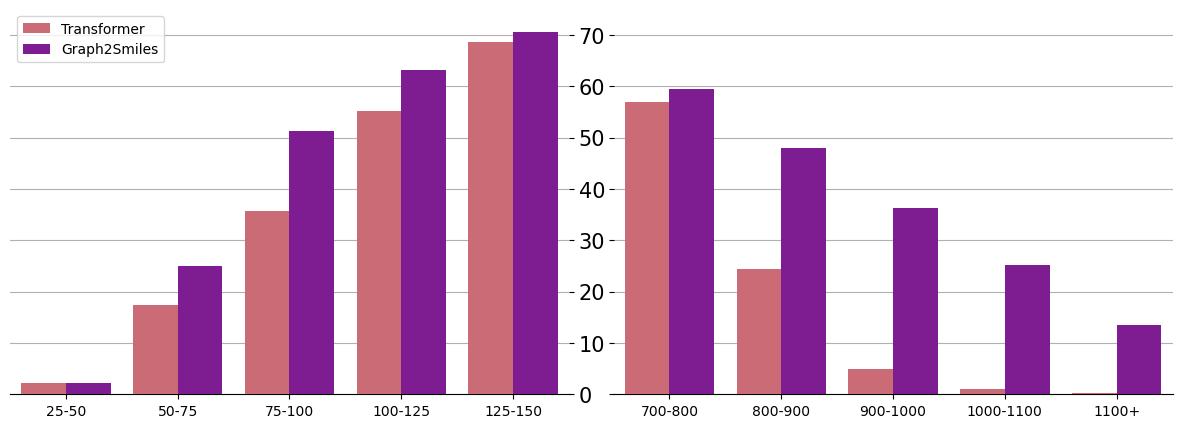

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(
    1,
    2,
    figsize=(15, 5),
    gridspec_kw={"hspace": 0, "wspace": 0.080},
    sharey=True,
)

sns.barplot(
    data=accs_full,
    y="accuracy",
    x=accs_full.index,
    hue="model",
    palette={"Transformer": "#DB5B68", "Graph2Smiles": "#8B0AA5"},
    ax=ax[1],
    zorder=4,
)

# ax[1].ylabel("")
ax[1].set_ylabel("")
ax[1].set_ylim((0, 75))
# set xtick labels
ax[1].set_xticklabels(
    ["700-800", "800-900", "900-1000", "1000-1100", "1100+"],  # rotation=20
)

ax[1].spines["left"].set_visible(False)
ax[1].grid(axis="y", zorder=1)


# plt.xlim(0,20)
# ax.set_xlabel('Number of stereocenters in products')

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

# plt.savefig('num_stereo.svg')
# plt.show()
# ax[1].savefig("high_mw.svg", bbox_inches="tight")
# plt.title('Accuracy by Molecular Weight for high mw test set');

sns.barplot(
    data=accs_low_full,
    y="accuracy",
    x=accs_low_full.index,
    hue="model",
    palette={"Transformer": "#DB5B68", "Graph2Smiles": "#8B0AA5"},
    ax=ax[0],
    zorder=4,
)

# ax[0].ylabel("")
ax[0].set_ylim((0, 75))
ax[0].set_xticklabels(
    ["25-50", "50-75", "75-100", "100-125", "125-150"], rotation=0
)


ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].spines["top"].set_visible(False)

# ax[0].yaxis.set_label_position("right")
ax[0].yaxis.tick_right()
ax[0].set_ylabel("")

ax[0].grid(axis="y", zorder=1)
ax[1].get_legend().remove()

labls = ax[0].yaxis.get_ticklabels()
ax[0].yaxis.set_ticklabels(labls, fontsize=15)
ax[0].legend(loc=0)
# ax[0].legend()
# ax[0].savefig("low_mw.svg", bbox_inches="tight")
# plt.title('Accuracy by Molecular Weight for low mw test set');

plt.savefig("MW_shift.svg")
# fig

In [67]:
!pwd

/home/andres/Documents/choriso-fr/notebooks
